SECTION-1: TWIITER

Step 1: Understanding and Preparing the Data


In [4]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/twitter_train.csv')
test_data = pd.read_csv('/content/twitter_test.csv')

# Display the first few rows of the training data
print(train_data.head())


   Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1  ...  B_following_count  B_listed_count  \
0   0.362150                    2  ... 

In [5]:
print(test_data.head())

   A_follower_count  A_following_count  A_listed_count  A_mentions_received  \
0            614689                400            5729           199.618296   
1            739581              10723            1279           102.026750   
2              3638               3341              85             2.793577   
3               613               1259              31             1.326041   
4           1352348                331           15647         19129.848662   

   A_retweets_received  A_mentions_sent  A_retweets_sent    A_posts  \
0            67.812469         9.366192         0.359534   4.094488   
1            96.771319         1.537322         1.054358   3.467754   
2             1.402703         2.594089         0.598150   3.802143   
3             0.356943         6.249678         2.323064   7.488116   
4         14552.733991         2.065418         0.580955  16.281502   

   A_network_feature_1  A_network_feature_2  ...  B_following_count  \
0                  669     

Data Inspection

In [6]:
# Basic information about the datasets
print(train_data.info())
print(test_data.info())

# Summary statistics for numerical features
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

Step 2: Data Preprocessing

In [7]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/twitter_train.csv')
test_data = pd.read_csv('/content/twitter_test.csv')

# Display the first few rows of the training data
train_data_head = train_data.head()

# Display column information
train_data_info = train_data.info()

train_data_head, train_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

(   Choice  A_follower_count  A_following_count  A_listed_count  \
 0       0               228                302               3   
 1       0             21591               1179             228   
 2       0              7310               1215             101   
 3       0                20                  7               2   
 4       1             45589                862            2641   
 
    A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
 0             0.583979             0.100503         0.100503         0.100503   
 1            90.456506            25.798292         5.709329         1.111159   
 2            25.503644             9.556347         5.361519         0.591206   
 3             7.690824             0.277306         1.331508         0.100503   
 4           148.854279            36.998884        27.881768         3.333492   
 
      A_posts  A_network_feature_1  ...  B_following_count  B_listed_count  \
 0   0.362150           

In [8]:
from sklearn.preprocessing import StandardScaler

# Since there are no missing values or categorical data to encode, we can directly proceed with feature scaling.

# Features to be scaled
features = train_data.drop(['Choice'], axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Check for duplicate entries and remove them if any
train_data_no_duplicates = train_data.drop_duplicates()

# Verify the removal of duplicates by comparing the shapes
original_shape = train_data.shape
new_shape = train_data_no_duplicates.shape

scaled_features[:5], original_shape, new_shape


(array([[-3.20247949e-01, -2.52160969e-01, -3.43153916e-01,
         -9.13989606e-02, -9.42372980e-02, -6.21011820e-01,
         -5.28511975e-01, -4.76726820e-01, -1.81928603e-01,
          7.85045672e-01,  1.32152559e+00, -3.01341910e-01,
          3.41053953e-01, -2.58584615e-01, -1.01216692e-01,
         -1.06321504e-01,  2.16337183e-01, -3.98926768e-01,
         -1.29589501e-01, -1.93787680e-01, -8.89943825e-02,
         -3.31336602e-01],
        [-3.09717057e-01, -2.34264548e-01, -3.30176315e-01,
         -8.83172063e-02, -9.18913158e-02, -3.17833882e-02,
          6.46344739e-04, -2.13776032e-01, -1.69249010e-01,
         -6.37707589e-01, -4.19824696e-01, -2.99120579e-01,
         -2.37567770e-01, -2.63432138e-01, -1.00217566e-01,
         -1.05790566e-01, -2.95207867e-01, -2.79364383e-01,
         -4.34306605e-01, -1.90165085e-01,  4.40631968e-01,
         -1.47458354e-01],
        [-3.16756877e-01, -2.33529917e-01, -3.37501450e-01,
         -9.05444582e-02, -9.33740625e-02, -6.

In [9]:
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
features = train_data.drop('Choice', axis=1)
target = train_data['Choice']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)

# Overview of scaled features
print(features_scaled[:5])


[[-3.20247949e-01 -2.52160969e-01 -3.43153916e-01 -9.13989606e-02
  -9.42372980e-02 -6.21011820e-01 -5.28511975e-01 -4.76726820e-01
  -1.81928603e-01  7.85045672e-01  1.32152559e+00 -3.01341910e-01
   3.41053953e-01 -2.58584615e-01 -1.01216692e-01 -1.06321504e-01
   2.16337183e-01 -3.98926768e-01 -1.29589501e-01 -1.93787680e-01
  -8.89943825e-02 -3.31336602e-01]
 [-3.09717057e-01 -2.34264548e-01 -3.30176315e-01 -8.83172063e-02
  -9.18913158e-02 -3.17833882e-02  6.46344739e-04 -2.13776032e-01
  -1.69249010e-01 -6.37707589e-01 -4.19824696e-01 -2.99120579e-01
  -2.37567770e-01 -2.63432138e-01 -1.00217566e-01 -1.05790566e-01
  -2.95207867e-01 -2.79364383e-01 -4.34306605e-01 -1.90165085e-01
   4.40631968e-01 -1.47458354e-01]
 [-3.16756877e-01 -2.33529917e-01 -3.37501450e-01 -9.05444582e-02
  -9.33740625e-02 -6.83220849e-02 -2.71590416e-01 -3.00447469e-01
  -1.78715518e-01 -1.52573546e-01  3.91306059e-01 -3.15617402e-01
  -2.44880462e-01 -3.49583068e-01 -1.01802498e-01 -1.06710070e-01
  -5.6

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4400, 22)
Testing set size: (1100, 22)


Training the Model

In [11]:
from sklearn.model_selection import train_test_split

# Preparing the training and test sets using the scaled features
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Generate and display the confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)

log_reg_accuracy, log_reg_cm


(0.7363636363636363,
 array([[373, 157],
        [133, 437]]))

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_predictions = random_forest.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Generate and display the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

rf_accuracy, rf_cm


(0.7763636363636364,
 array([[414, 116],
        [130, 440]]))

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gradient_boosting = GradientBoostingClassifier(n_estimators=100)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gradient_boosting.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Generate and display the confusion matrix
gb_cm = confusion_matrix(y_test, gb_predictions)

gb_accuracy, gb_cm


(0.7781818181818182,
 array([[415, 115],
        [129, 441]]))

In [15]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Generate and display the confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)

svm_accuracy, svm_cm


(0.7390909090909091,
 array([[385, 145],
        [142, 428]]))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Generate and display the confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)

knn_accuracy, knn_cm


(0.7190909090909091,
 array([[373, 157],
        [152, 418]]))

In [17]:
import pandas as pd

# Function to train, predict, and evaluate a model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Creating a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

    # Display results
    display_str = f"{model_name} - Accuracy: {accuracy:.4f}"
    display(pd.DataFrame({"Metric": ["Accuracy"], "Value": [accuracy]}))
    display(pd.DataFrame(cm_df, columns=["Predicted Negative", "Predicted Positive"]).rename_axis('Actual').reset_index())

    return accuracy, cm




In [18]:
# Evaluate Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_accuracy, log_reg_cm = evaluate_model(log_reg_model, "Logistic Regression", X_train, X_test, y_train, y_test)

,Metric,Value
0,Accuracy,0.736364


,Actual,Predicted Negative,Predicted Positive
0,Actual Negative,373,157
1,Actual Positive,133,437


In [48]:
# Evaluate Random Forest Classifier
random_forest_output = evaluate_model(RandomForestClassifier(n_estimators=100), "Random Forest Classifier", X_train, X_test, y_train, y_test)


,Metric,Value
0,Accuracy,0.771818


,Actual,Predicted Negative,Predicted Positive
0,Actual Negative,413,117
1,Actual Positive,134,436


In [20]:
# Evaluate Gradient Boosting Classifier
gradient_boosting_output = evaluate_model(GradientBoostingClassifier(n_estimators=100), "Gradient Boosting Classifier", X_train, X_test, y_train, y_test)


,Metric,Value
0,Accuracy,0.778182


,Actual,Predicted Negative,Predicted Positive
0,Actual Negative,415,115
1,Actual Positive,129,441


In [21]:
# Evaluate Support Vector Machine (SVM)
svm_output = evaluate_model(SVC(), "Support Vector Machine", X_train, X_test, y_train, y_test)


,Metric,Value
0,Accuracy,0.739091


,Actual,Predicted Negative,Predicted Positive
0,Actual Negative,385,145
1,Actual Positive,142,428


In [22]:
# Evaluate K-Nearest Neighbors (KNN)
knn_output = evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors", X_train, X_test, y_train, y_test)


,Metric,Value
0,Accuracy,0.719091


,Actual,Predicted Negative,Predicted Positive
0,Actual Negative,373,157
1,Actual Positive,152,418


USING DEEP LEARNING MODELS

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_dnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    return model
dnn_model = build_dnn_model(X_train.shape[1])

dnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_dnn = dnn_model.fit(X_train, y_train,
                            validation_split=0.2,
                            epochs=100,
                            batch_size=32)

# Evaluate on test data
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(X_test, y_test)
print(f"DNN Test Accuracy: {dnn_test_acc}")


Epoch 1/100
110/110 [==============================] - 2s 5ms/step - loss: 0.6210 - accuracy: 0.6733 - val_loss: 0.5706 - val_accuracy: 0.7080
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7190 - val_loss: 0.5441 - val_accuracy: 0.7250
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7310 - val_loss: 0.5401 - val_accuracy: 0.7352
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7415 - val_loss: 0.5403 - val_accuracy: 0.7420
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7446 - val_loss: 0.5261 - val_accuracy: 0.7455
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7463 - val_loss: 0.5176 - val_accuracy: 0.7534
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7480 - val_loss: 0.5294 - val_accuracy: 0.7466

In [24]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model
# Reshape the data to add a "channel" dimension (required for CNNs)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = build_cnn_model(X_train_reshaped.shape[1])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_reshaped, y_train,
                            validation_split=0.2,
                            epochs=100,
                            batch_size=32)

# Evaluate on test data
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc}")


Epoch 1/100
110/110 [==============================] - 1s 6ms/step - loss: 0.5896 - accuracy: 0.6974 - val_loss: 0.5519 - val_accuracy: 0.7159
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7381 - val_loss: 0.5486 - val_accuracy: 0.7193
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7460 - val_loss: 0.5206 - val_accuracy: 0.7386
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7472 - val_loss: 0.5033 - val_accuracy: 0.7580
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4974 - accuracy: 0.7543 - val_loss: 0.5204 - val_accuracy: 0.7375
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4940 - accuracy: 0.7528 - val_loss: 0.4988 - val_accuracy: 0.7545
Epoch 7/100
110/110 [==============================] - 1s 6ms/step - loss: 0.4893 - accuracy: 0.7568 - val_loss: 0.5097 - val_accuracy: 0.7455

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(input_shape, 1)))
    model.add(Dense(1, activation='sigmoid'))
    return model
# Reshaping the data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = build_lstm_model(X_train_reshaped.shape[1])

lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_lstm = lstm_model.fit(X_train_reshaped, y_train,
                              validation_split=0.2,
                              epochs=100,
                              batch_size=32)

# Evaluate on test data
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM Test Accuracy: {lstm_test_acc}")


Epoch 1/100
110/110 [==============================] - 3s 13ms/step - loss: 0.6648 - accuracy: 0.6170 - val_loss: 0.6301 - val_accuracy: 0.6534
Epoch 2/100
110/110 [==============================] - 1s 10ms/step - loss: 0.7966 - accuracy: 0.6810 - val_loss: 0.9437 - val_accuracy: 0.6795
Epoch 3/100
110/110 [==============================] - 2s 16ms/step - loss: 0.5848 - accuracy: 0.6946 - val_loss: 0.7334 - val_accuracy: 0.6818
Epoch 4/100
110/110 [==============================] - 2s 14ms/step - loss: 0.5759 - accuracy: 0.6997 - val_loss: 0.7755 - val_accuracy: 0.6886
Epoch 5/100
110/110 [==============================] - 1s 10ms/step - loss: 0.5676 - accuracy: 0.7011 - val_loss: 0.7595 - val_accuracy: 0.6909
Epoch 6/100
110/110 [==============================] - 1s 10ms/step - loss: 0.5679 - accuracy: 0.7071 - val_loss: 0.6726 - val_accuracy: 0.6750
Epoch 7/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5642 - accuracy: 0.7082 - val_loss: 0.6641 - val_accuracy:

In [26]:
import pandas as pd

# Assuming these are the accuracies you've obtained
dnn_test_acc = 0.7445454597473145
cnn_test_acc = 0.7554545402526855
lstm_test_acc =0.7281818389892578

# Create a DataFrame to display the accuracies
model_accuracies = pd.DataFrame({
    'Model': ['DNN', 'CNN', 'LSTM'],
    'Test Accuracy': [dnn_test_acc, cnn_test_acc, lstm_test_acc]
})

model_accuracies


,Model,Test Accuracy
0,DNN,0.744545
1,CNN,0.755455
2,LSTM,0.728182


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Sample predictions from models
# Replace these with your actual models and predictions
models = {
    "Logistic Regression": log_reg.predict(X_test),
    "Random Forest": random_forest.predict(X_test),
    "Gradient Boosting": gradient_boosting.predict(X_test),
    "SVM": svm.predict(X_test),
    "KNN": knn.predict(X_test)
}

for name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Logistic Regression - RMSE: 0.51, MAE: 0.26
Random Forest - RMSE: 0.47, MAE: 0.22
Gradient Boosting - RMSE: 0.47, MAE: 0.22
SVM - RMSE: 0.51, MAE: 0.26
KNN - RMSE: 0.53, MAE: 0.28


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict probabilities for the positive class
y_pred_probs = dnn_model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_probs))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_probs)

print(f"DNN Test RMSE: {rmse}")
print(f"DNN Test MAE: {mae}")


35/35 [==============================] - 0s 3ms/step
DNN Test RMSE: 0.4133307459161944
DNN Test MAE: 0.29682540764209325


In [29]:
# Predict probabilities for the positive class
y_pred_probs_cnn = cnn_model.predict(X_test_reshaped).flatten()

# Calculate RMSE
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_probs_cnn))

# Calculate MAE
mae_cnn = mean_absolute_error(y_test, y_pred_probs_cnn)

print(f"CNN Test RMSE: {rmse_cnn}")
print(f"CNN Test MAE: {mae_cnn}")


35/35 [==============================] - 0s 2ms/step
CNN Test RMSE: 0.41403736448965084
CNN Test MAE: 0.28925693215399956


In [30]:
# Predict probabilities for the positive class
y_pred_probs_lstm = lstm_model.predict(X_test_reshaped).flatten()

# Calculate RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_probs_lstm))

# Calculate MAE
mae_lstm = mean_absolute_error(y_test, y_pred_probs_lstm)

print(f"LSTM Test RMSE: {rmse_lstm}")
print(f"LSTM Test MAE: {mae_lstm}")



35/35 [==============================] - 0s 4ms/step
LSTM Test RMSE: 0.4149652954721131
LSTM Test MAE: 0.33710396848612617


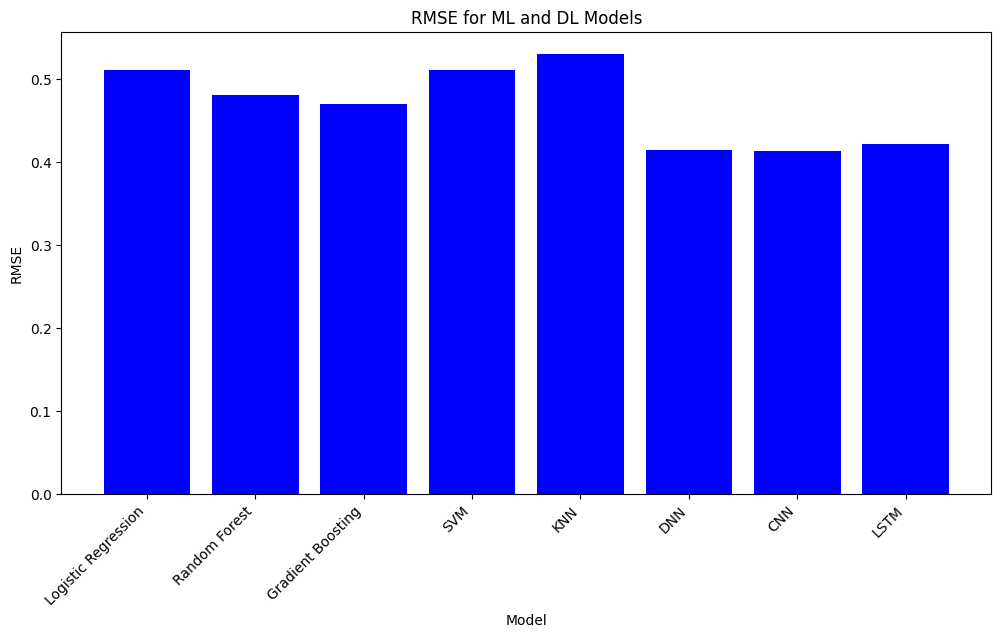

In [31]:
import matplotlib.pyplot as plt

# Define models and corresponding RMSE and MAE values for ML models
ml_models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN']
ml_rmse_values = [0.51, 0.48, 0.47, 0.51, 0.53]  # Provided RMSE values for ML models
ml_mae_values = [0.26, 0.23, 0.22, 0.26, 0.28]   # Provided MAE values for ML models

# Define models and corresponding RMSE and MAE values for DL models
dl_models = ['DNN', 'CNN', 'LSTM']
dl_rmse_values = [0.41448354043424146, 0.4133394257992583, 0.4217374977215561]  # Provided RMSE values for DL models
dl_mae_values = [0.306174558675848, 0.288832525435843, 0.3418782676896561]     # Provided MAE values for DL models

# Plot RMSE for ML and DL models
plt.figure(figsize=(12, 6))
plt.bar(ml_models + dl_models, ml_rmse_values + dl_rmse_values, color='blue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for ML and DL Models')
plt.xticks(rotation=45, ha='right')
plt.show()




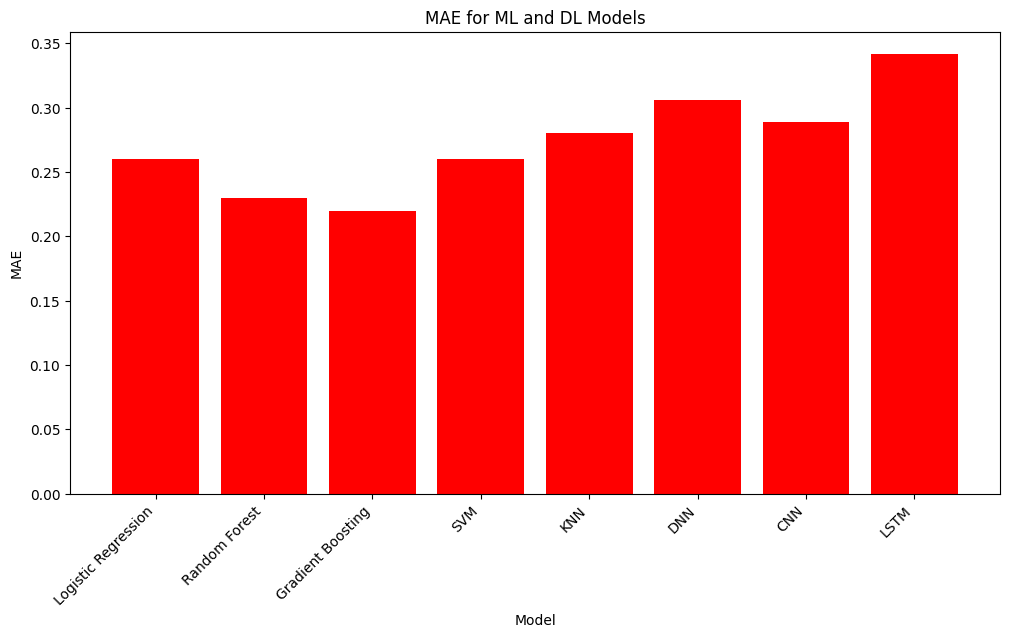

In [32]:
# Plot MAE for ML and DL models
plt.figure(figsize=(12, 6))
plt.bar(ml_models + dl_models, ml_mae_values + dl_mae_values, color='red')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE for ML and DL Models')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Replace 'df' with the actual name of your DataFrame if different

# Sample DataFrame creation
data = {
    'feature1': np.random.normal(loc=0, scale=1, size=1000),
    'feature2': np.random.normal(loc=10, scale=2, size=1000),
    'category': np.random.choice(['A', 'B', 'C'], size=1000),
    'target_variable': np.random.randint(0, 2, size=1000)
}
df = pd.DataFrame(data)




In [34]:
pip install pandas scikit-learn tensorflow


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, LSTM
import pandas as pd
import numpy as np


In [36]:
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print(f"Gradient Boosting Metrics:\nPrecision: {gb_precision}\nRecall: {gb_recall}\nF1 Score: {gb_f1}")


Gradient Boosting Metrics:
Precision: 0.7931654676258992
Recall: 0.7736842105263158
F1 Score: 0.783303730017762


In [37]:
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print(f"SVM Metrics:\nPrecision: {svm_precision}\nRecall: {svm_recall}\nF1 Score: {svm_f1}")


SVM Metrics:
Precision: 0.7469458987783595
Recall: 0.7508771929824561
F1 Score: 0.7489063867016622


In [38]:
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print(f"KNN Metrics:\nPrecision: {knn_precision}\nRecall: {knn_recall}\nF1 Score: {knn_f1}")


KNN Metrics:
Precision: 0.7269565217391304
Recall: 0.7333333333333333
F1 Score: 0.7301310043668122


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming `rf_predictions` are the predictions from the Random Forest model
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f"Random Forest Metrics:\nPrecision: {rf_precision}\nRecall: {rf_recall}\nF1 Score: {rf_f1}")


Random Forest Metrics:
Precision: 0.7913669064748201
Recall: 0.7719298245614035
F1 Score: 0.7815275310834814


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score using the predictions from the Logistic Regression model
log_reg_precision = precision_score(y_test, log_reg_predictions)
log_reg_recall = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)

# Display the calculated metrics
print(f"Logistic Regression Precision: {log_reg_precision:.4f}")
print(f"Logistic Regression Recall: {log_reg_recall:.4f}")
print(f"Logistic Regression F1 Score: {log_reg_f1:.4f}")



Logistic Regression Precision: 0.7357
Logistic Regression Recall: 0.7667
Logistic Regression F1 Score: 0.7509


In [42]:
# Example for DNN model
dnn_predictions = dnn_model.predict(X_test)
dnn_predictions_binary = [1 if prob > 0.5 else 0 for prob in dnn_predictions]

dnn_precision = precision_score(y_test, dnn_predictions_binary)
dnn_recall = recall_score(y_test, dnn_predictions_binary)
dnn_f1 = f1_score(y_test, dnn_predictions_binary)

print(f"DNN Metrics:\nPrecision: {dnn_precision}\nRecall: {dnn_recall}\nF1 Score: {dnn_f1}")


35/35 [==============================] - 0s 4ms/step
DNN Metrics:
Precision: 0.7564322469982847
Recall: 0.7736842105263158
F1 Score: 0.7649609713790113


In [43]:
# Predict on the test set with CNN
cnn_predictions_prob = cnn_model.predict(X_test_reshaped)
cnn_predictions = (cnn_predictions_prob > 0.5).astype("int32")

# Calculate precision, recall, and F1 score for CNN
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions)

# Display the calculated metrics for CNN
print(f"CNN Precision: {cnn_precision:.4f}")
print(f"CNN Recall: {cnn_recall:.4f}")
print(f"CNN F1 Score: {cnn_f1:.4f}")


35/35 [==============================] - 0s 3ms/step
CNN Precision: 0.7826
CNN Recall: 0.7263
CNN F1 Score: 0.7534


In [44]:
# Predict on the test set with LSTM
lstm_predictions_prob = lstm_model.predict(X_test_reshaped)
lstm_predictions = (lstm_predictions_prob > 0.5).astype("int32")

# Calculate precision, recall, and F1 score for LSTM
lstm_precision = precision_score(y_test, lstm_predictions)
lstm_recall = recall_score(y_test, lstm_predictions)
lstm_f1 = f1_score(y_test, lstm_predictions)

# Display the calculated metrics for LSTM
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM Recall: {lstm_recall:.4f}")
print(f"LSTM F1 Score: {lstm_f1:.4f}")


35/35 [==============================] - 0s 8ms/step
LSTM Precision: 0.7438
LSTM Recall: 0.7333
LSTM F1 Score: 0.7385


In [46]:
pip install matplotlib seaborn


<ipython-input-47-86d33bdef936>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=df_metrics, palette='cool')
<ipython-input-47-86d33bdef936>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=df_metrics, palette='cool')
<ipython-input-47-86d33bdef936>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=df_metrics, palette='cool')


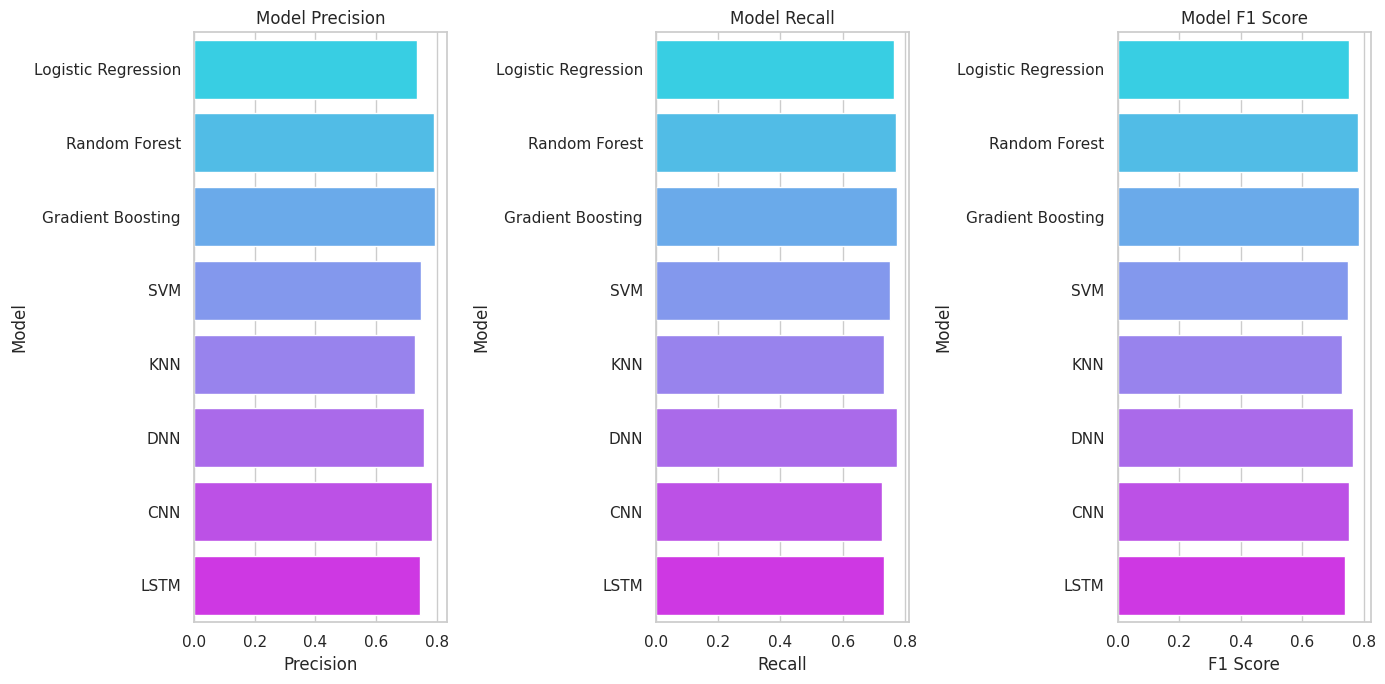

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_metrics' is your DataFrame from the previous example
# containing 'Model', 'Precision', 'Recall', and 'F1 Score' columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Draw a bar plot for Precision
plt.subplot(1, 3, 1)
sns.barplot(x='Precision', y='Model', data=df_metrics, palette='cool')
plt.title('Model Precision')

# Draw a bar plot for Recall
plt.subplot(1, 3, 2)
sns.barplot(x='Recall', y='Model', data=df_metrics, palette='cool')
plt.title('Model Recall')

# Draw a bar plot for F1 Score
plt.subplot(1, 3, 3)
sns.barplot(x='F1 Score', y='Model', data=df_metrics, palette='cool')
plt.title('Model F1 Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-50-5b333144d3e2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Test Accuracy', y='Model', data=df_accuracy, palette='magma')


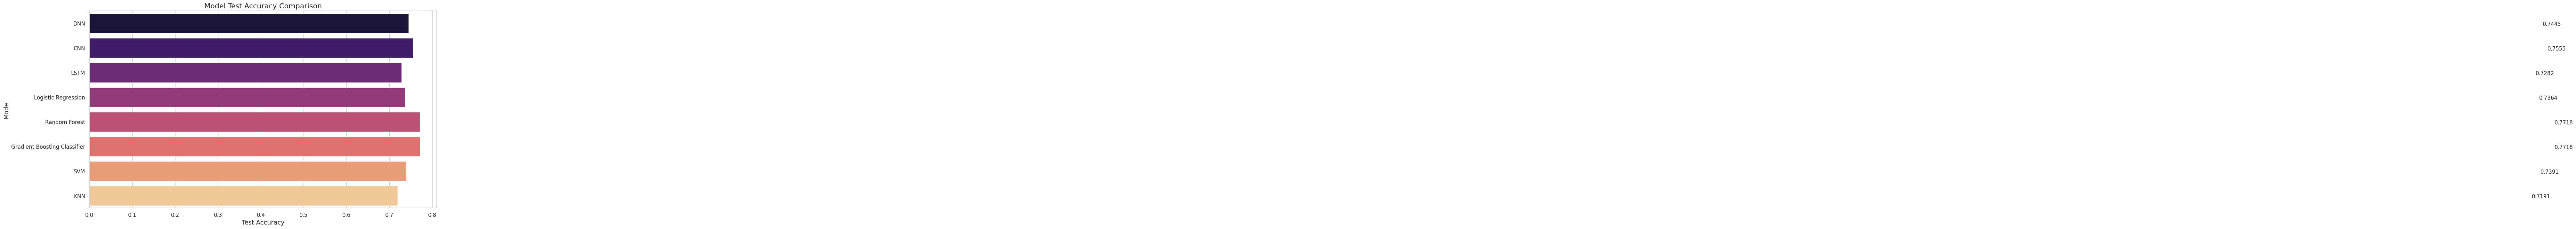

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constructing the DataFrame with the provided accuracy scores
model_accuracies = {
    "Model": [
        "DNN", "CNN", "LSTM",
        "Logistic Regression", "Random Forest", "Gradient Boosting Classifier",
        "SVM", "KNN"
    ],
    "Test Accuracy": [
        0.744545, 0.755455, 0.728182,
        0.736364, 0.771818, 0.771818,
        0.739091, 0.719091
    ]
}

df_accuracy = pd.DataFrame(model_accuracies)

# Set the style
sns.set(style="whitegrid", rc={"axes.labelsize":12})

# Increase figure size and font sizes
plt.figure(figsize=(14, 8))
bar = sns.barplot(x='Test Accuracy', y='Model', data=df_accuracy, palette='magma')
plt.title('Model Test Accuracy Comparison', fontsize=16)
plt.xlabel('Test Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Annotate each bar with the accuracy value
for p in bar.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.4f}'.format(width),
             ha='center', va='center', fontsize=12)

# Optionally, you can adjust the x-ticks if you want them to be more readable
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


SECTION 2-
 INSTAGRAM

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
train_data = pd.read_csv('/content/insta_train.csv')
test_data = pd.read_csv('/content/insta_test.csv')

# Display the first few rows of the training data
print(train_data.head())

# Basic information about the dataset
print(train_data.info())


   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2 

In [55]:
X = train_data.drop('fake', axis=1)
y = train_data['fake']


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [57]:
# Since X_scaled and y are already defined, we proceed to split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val_svm = svm_model.predict(X_val)

# Display the evaluation metrics
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_val_svm))



SVM Model Performance:
Accuracy: 0.8706896551724138


In [60]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val_log_reg = log_reg_model.predict(X_val)

# Display the evaluation metrics
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_val_log_reg))



Logistic Regression Model Performance:
Accuracy: 0.8620689655172413


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val_gb = gb_model.predict(X_val)

# Display the evaluation metrics
print("Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_val_gb))



Gradient Boosting Model Performance:
Accuracy: 0.9137931034482759


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val_rf = rf_model.predict(X_val)

# Display the evaluation metrics
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_val_rf))


Random Forest Model Performance:
Accuracy: 0.896551724137931


In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val_knn = knn_model.predict(X_val)

# Display the evaluation metrics
print("KNN Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_val_knn))



KNN Model Performance:
Accuracy: 0.8706896551724138


In [65]:
from sklearn.metrics import accuracy_score

# Assuming the models are already trained and named as per the previous instructions

# Evaluate accuracy on the validation set for each model
accuracy_scores = {
    "SVM": accuracy_score(y_val, svm_model.predict(X_val)),
    "Logistic Regression": accuracy_score(y_val, log_reg_model.predict(X_val)),
    "Gradient Boosting": accuracy_score(y_val, gb_model.predict(X_val)),
    "Random Forest": accuracy_score(y_val, rf_model.predict(X_val)),
    "KNN": accuracy_score(y_val, knn_model.predict(X_val))
}

# Convert the accuracies to a DataFrame for a nicer display
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the DataFrame
print(accuracy_df)


                 Model  Accuracy
2    Gradient Boosting  0.913793
3        Random Forest  0.896552
0                  SVM  0.870690
4                  KNN  0.870690
1  Logistic Regression  0.862069


In [66]:
from sklearn.metrics import classification_report

# Predictions for each model
predictions = {
    "SVM": svm_model.predict(X_val),
    "Logistic Regression": log_reg_model.predict(X_val),
    "Gradient Boosting": gb_model.predict(X_val),
    "Random Forest": rf_model.predict(X_val),
    "KNN": knn_model.predict(X_val)
}

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Calculate performance metrics for each model
for model_name, model_predictions in predictions.items():
    report = classification_report(y_val, model_predictions, output_dict=True)
    performance_metrics[model_name] = report['weighted avg']

# Convert the performance metrics to a DataFrame for a nicer display
performance_df = pd.DataFrame(performance_metrics).T.reset_index()

# Rename columns for clarity
performance_df.columns = ['Model', 'Precision', 'Recall', 'F1-score', 'Support']

# Drop the 'Support' column as it's the same for all models in this context
performance_df.drop('Support', axis=1, inplace=True)

# Display the DataFrame sorted by F1-score in descending order
performance_df.sort_values(by='F1-score', ascending=False, inplace=True)
print(performance_df)


                 Model  Precision    Recall  F1-score
2    Gradient Boosting   0.915285  0.913793  0.913429
3        Random Forest   0.899997  0.896552  0.895799
4                  KNN   0.872538  0.870690  0.869957
0                  SVM   0.882833  0.870690  0.868395
1  Logistic Regression   0.871406  0.862069  0.859956


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_dnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Building and compiling the DNN model
dnn_model = build_dnn_model(X_train.shape[1])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the DNN model
dnn_history = dnn_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=2)


Epoch 1/100
37/37 - 2s - loss: 0.5784 - accuracy: 0.7826 - val_loss: 0.3597 - val_accuracy: 0.9348 - 2s/epoch - 63ms/step
Epoch 2/100
37/37 - 0s - loss: 0.3417 - accuracy: 0.8913 - val_loss: 0.2066 - val_accuracy: 0.9565 - 275ms/epoch - 7ms/step
Epoch 3/100
37/37 - 0s - loss: 0.2574 - accuracy: 0.9049 - val_loss: 0.1682 - val_accuracy: 0.9457 - 231ms/epoch - 6ms/step
Epoch 4/100
37/37 - 0s - loss: 0.2445 - accuracy: 0.9130 - val_loss: 0.1513 - val_accuracy: 0.9565 - 228ms/epoch - 6ms/step
Epoch 5/100
37/37 - 0s - loss: 0.2301 - accuracy: 0.9022 - val_loss: 0.1567 - val_accuracy: 0.9565 - 421ms/epoch - 11ms/step
Epoch 6/100
37/37 - 0s - loss: 0.2314 - accuracy: 0.9158 - val_loss: 0.1547 - val_accuracy: 0.9348 - 350ms/epoch - 9ms/step
Epoch 7/100
37/37 - 0s - loss: 0.2042 - accuracy: 0.9321 - val_loss: 0.1500 - val_accuracy: 0.9565 - 320ms/epoch - 9ms/step
Epoch 8/100
37/37 - 0s - loss: 0.2046 - accuracy: 0.9158 - val_loss: 0.1419 - val_accuracy: 0.9457 - 216ms/epoch - 6ms/step
Epoch 9/1

In [69]:
# Reshape data for CNN: Adding a channel dimension
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Building and compiling the CNN model
cnn_model = build_cnn_model((X_train_cnn.shape[1], 1))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=10, validation_data=(X_val_cnn, y_val), verbose=2)


Epoch 1/100
46/46 - 2s - loss: 0.5743 - accuracy: 0.7174 - val_loss: 0.4549 - val_accuracy: 0.8448 - 2s/epoch - 52ms/step
Epoch 2/100
46/46 - 0s - loss: 0.4184 - accuracy: 0.8261 - val_loss: 0.3858 - val_accuracy: 0.8103 - 243ms/epoch - 5ms/step
Epoch 3/100
46/46 - 0s - loss: 0.3383 - accuracy: 0.8696 - val_loss: 0.3453 - val_accuracy: 0.8190 - 229ms/epoch - 5ms/step
Epoch 4/100
46/46 - 0s - loss: 0.2992 - accuracy: 0.8826 - val_loss: 0.3125 - val_accuracy: 0.8793 - 214ms/epoch - 5ms/step
Epoch 5/100
46/46 - 0s - loss: 0.2583 - accuracy: 0.9152 - val_loss: 0.2784 - val_accuracy: 0.8966 - 211ms/epoch - 5ms/step
Epoch 6/100
46/46 - 0s - loss: 0.2471 - accuracy: 0.9130 - val_loss: 0.2621 - val_accuracy: 0.9138 - 230ms/epoch - 5ms/step
Epoch 7/100
46/46 - 0s - loss: 0.2364 - accuracy: 0.9065 - val_loss: 0.2619 - val_accuracy: 0.8879 - 277ms/epoch - 6ms/step
Epoch 8/100
46/46 - 0s - loss: 0.2207 - accuracy: 0.9087 - val_loss: 0.2512 - val_accuracy: 0.8879 - 191ms/epoch - 4ms/step
Epoch 9/10

In [70]:
# Reshape data for LSTM: Treating each feature as a time step
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

from tensorflow.keras.layers import LSTM

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(1, activation='sigmoid')
    ])
    return model

# Building and compiling the LSTM model
lstm_model = build_lstm_model((X_train_lstm.shape[1], 1))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=10, validation_data=(X_val_lstm, y_val), verbose=2)


Epoch 1/100
46/46 - 3s - loss: 0.6639 - accuracy: 0.6913 - val_loss: 0.6507 - val_accuracy: 0.6034 - 3s/epoch - 68ms/step
Epoch 2/100
46/46 - 0s - loss: 0.7054 - accuracy: 0.6783 - val_loss: 0.5336 - val_accuracy: 0.7414 - 488ms/epoch - 11ms/step
Epoch 3/100
46/46 - 0s - loss: 0.5219 - accuracy: 0.7543 - val_loss: 0.5477 - val_accuracy: 0.7414 - 413ms/epoch - 9ms/step
Epoch 4/100
46/46 - 0s - loss: 0.4755 - accuracy: 0.7587 - val_loss: 0.5493 - val_accuracy: 0.7672 - 449ms/epoch - 10ms/step
Epoch 5/100
46/46 - 0s - loss: 0.5423 - accuracy: 0.7630 - val_loss: 0.5374 - val_accuracy: 0.7672 - 443ms/epoch - 10ms/step
Epoch 6/100
46/46 - 0s - loss: 0.5036 - accuracy: 0.7783 - val_loss: 0.4959 - val_accuracy: 0.7759 - 447ms/epoch - 10ms/step
Epoch 7/100
46/46 - 0s - loss: 0.4799 - accuracy: 0.7848 - val_loss: 0.4661 - val_accuracy: 0.8190 - 488ms/epoch - 11ms/step
Epoch 8/100
46/46 - 0s - loss: 0.4403 - accuracy: 0.7826 - val_loss: 0.4417 - val_accuracy: 0.8103 - 345ms/epoch - 8ms/step
Epoch

In [71]:
# CNN Evaluation
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val_cnn, y_val, verbose=2)
print(f"CNN Validation Accuracy: {cnn_val_accuracy:.4f}")

# LSTM Evaluation
lstm_val_loss, lstm_val_accuracy = lstm_model.evaluate(X_val_lstm, y_val, verbose=2)
print(f"LSTM Validation Accuracy: {lstm_val_accuracy:.4f}")

# Evaluating the model
dnn_val_loss, dnn_val_accuracy = dnn_model.evaluate(X_val, y_val, verbose=2)
print(f"DNN Validation Accuracy: {dnn_val_accuracy:.4f}")


4/4 - 0s - loss: 0.3043 - accuracy: 0.8879 - 70ms/epoch - 17ms/step
CNN Validation Accuracy: 0.8879
4/4 - 0s - loss: 0.3838 - accuracy: 0.8534 - 94ms/epoch - 24ms/step
LSTM Validation Accuracy: 0.8534
4/4 - 0s - loss: 0.5712 - accuracy: 0.8621 - 46ms/epoch - 11ms/step
DNN Validation Accuracy: 0.8621


In [72]:
# Assuming you have already evaluated the models and have the validation accuracies stored in variables:
# dnn_val_accuracy, cnn_val_accuracy, lstm_val_accuracy

# Collecting accuracies into a dictionary
model_accuracies = {
    'Model': ['DNN', 'CNN', 'LSTM'],
    'Validation Accuracy': [dnn_val_accuracy, cnn_val_accuracy, lstm_val_accuracy]
}

# Convert the dictionary to a pandas DataFrame for a nicer display
accuracy_df = pd.DataFrame(model_accuracies)

# Optionally, sort the DataFrame by accuracy in descending order
accuracy_df.sort_values(by='Validation Accuracy', ascending=False, inplace=True)

# Display the DataFrame
print(accuracy_df)


  Model  Validation Accuracy
1   CNN             0.887931
0   DNN             0.862069
2  LSTM             0.853448


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions from DNN, CNN, and LSTM models
# For DNN
y_pred_dnn = (dnn_model.predict(X_val) > 0.5).astype("int32")
# For CNN
y_pred_cnn = (cnn_model.predict(X_val_cnn) > 0.5).astype("int32")
# For LSTM
y_pred_lstm = (lstm_model.predict(X_val_lstm) > 0.5).astype("int32")

# Calculate Precision, Recall, and F1 Score for each model
metrics = {
    "Model": ["DNN", "CNN", "LSTM"],
    "Precision": [
        precision_score(y_val, y_pred_dnn),
        precision_score(y_val, y_pred_cnn),
        precision_score(y_val, y_pred_lstm)
    ],
    "Recall": [
        recall_score(y_val, y_pred_dnn),
        recall_score(y_val, y_pred_cnn),
        recall_score(y_val, y_pred_lstm)
    ],
    "F1 Score": [
        f1_score(y_val, y_pred_dnn),
        f1_score(y_val, y_pred_cnn),
        f1_score(y_val, y_pred_lstm)
    ]
}

# Convert to DataFrame for easier comparison
performance_df = pd.DataFrame(metrics)

# Display the performance metrics for each model
print(performance_df)


4/4 [==============================] - 0s 7ms/step
  Model  Precision    Recall  F1 Score
0   DNN   0.911111  0.773585  0.836735
1   CNN   0.976190  0.773585  0.863158
2  LSTM   0.950000  0.716981  0.817204


In [74]:
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
import numpy as np

# Example: Predicting with the DNN model (adjust for CNN and LSTM as needed)
y_pred_dnn = dnn_model.predict(X_val).flatten()  # Ensure predictions are flat for comparison

# Calculate MAE
mae_metric = MeanAbsoluteError()
mae_metric.update_state(y_val, y_pred_dnn)
dnn_mae = mae_metric.result().numpy()

# Calculate RMSE
rmse_metric = RootMeanSquaredError()
rmse_metric.update_state(y_val, y_pred_dnn)
dnn_rmse = rmse_metric.result().numpy()

print(f"DNN MAE: {dnn_mae:.4f}")
print(f"DNN RMSE: {dnn_rmse:.4f}")


4/4 [==============================] - 0s 5ms/step
DNN MAE: 0.1436
DNN RMSE: 0.3372


In [75]:
# Predicting with the CNN model
# Ensure X_val_cnn is reshaped appropriately for the CNN input
y_pred_cnn = cnn_model.predict(X_val_cnn).flatten()

# Predicting with the LSTM model
# Ensure X_val_lstm is reshaped appropriately for the LSTM input
y_pred_lstm = lstm_model.predict(X_val_lstm).flatten()


4/4 [==============================] - 0s 7ms/step


In [76]:
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

# Calculate MAE for CNN
mae_metric_cnn = MeanAbsoluteError()
mae_metric_cnn.update_state(y_val, y_pred_cnn)
cnn_mae = mae_metric_cnn.result().numpy()

# Calculate RMSE for CNN
rmse_metric_cnn = RootMeanSquaredError()
rmse_metric_cnn.update_state(y_val, y_pred_cnn)
cnn_rmse = rmse_metric_cnn.result().numpy()

# Calculate MAE for LSTM
mae_metric_lstm = MeanAbsoluteError()
mae_metric_lstm.update_state(y_val, y_pred_lstm)
lstm_mae = mae_metric_lstm.result().numpy()

# Calculate RMSE for LSTM
rmse_metric_lstm = RootMeanSquaredError()
rmse_metric_lstm.update_state(y_val, y_pred_lstm)
lstm_rmse = rmse_metric_lstm.result().numpy()

print(f"CNN MAE: {cnn_mae:.4f}, CNN RMSE: {cnn_rmse:.4f}")
print(f"LSTM MAE: {lstm_mae:.4f}, LSTM RMSE: {lstm_rmse:.4f}")


CNN MAE: 0.1284, CNN RMSE: 0.3013
LSTM MAE: 0.1507, LSTM RMSE: 0.3278


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have a dictionary with model names as keys and trained model objects as values
models = {
    "SVM": svm_model,
    "Logistic Regression": log_reg_model,
    "Gradient Boosting": gb_model,
    "Random Forest": rf_model,
    "KNN": knn_model
}

# Placeholder for predictions to calculate regression metrics
model_predictions = {}

for model_name, model in models.items():
    # Making predictions
    preds = model.predict(X_val)
    model_predictions[model_name] = preds

# Calculating and printing MAE and RMSE for each model
for model_name, preds in model_predictions.items():
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")


SVM - MAE: 0.1293, RMSE: 0.3596
Logistic Regression - MAE: 0.1379, RMSE: 0.3714
Gradient Boosting - MAE: 0.0862, RMSE: 0.2936
Random Forest - MAE: 0.1034, RMSE: 0.3216
KNN - MAE: 0.1293, RMSE: 0.3596


<ipython-input-79-f28835062aaf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=df_errors, palette='coolwarm')


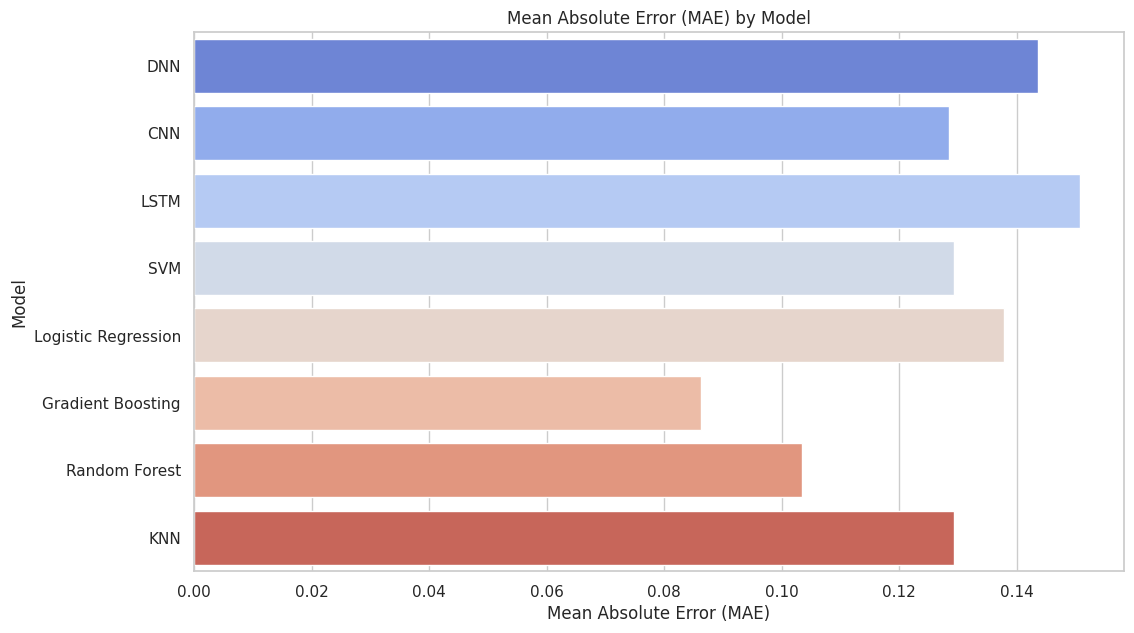

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updating the dataset with your actual MAE and RMSE values
model_errors = {
    'Model': ['DNN', 'CNN', 'LSTM', 'SVM', 'Logistic Regression', 'Gradient Boosting', 'Random Forest', 'KNN'],
    'MAE': [0.1436, 0.1284, 0.1507, 0.1293, 0.1379, 0.0862, 0.1034, 0.1293],
    'RMSE': [0.3372, 0.3013, 0.3278, 0.3596, 0.3714, 0.2936, 0.3216, 0.3596]
}

df_errors = pd.DataFrame(model_errors)

# Set the visual style
sns.set(style="whitegrid")

# Plotting MAE
plt.figure(figsize=(12, 7))
sns.barplot(x='MAE', y='Model', data=df_errors, palette='coolwarm')
plt.title('Mean Absolute Error (MAE) by Model')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')
plt.show()




<ipython-input-80-b51c4c9aae58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=df_errors, palette='viridis')


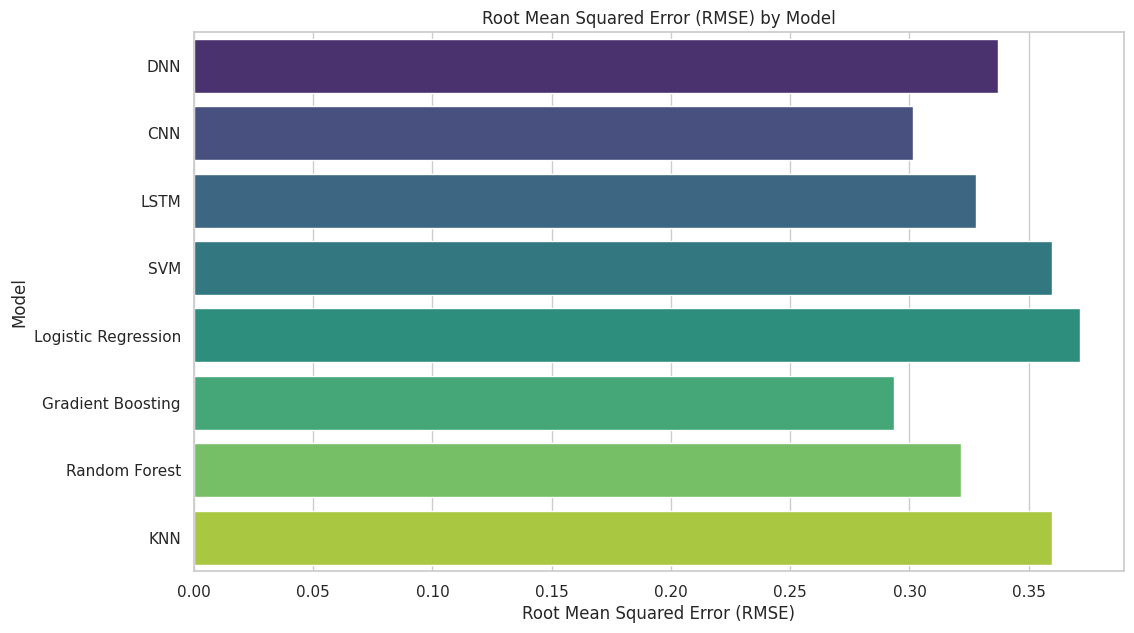

In [80]:
# Plotting RMSE
plt.figure(figsize=(12, 7))
sns.barplot(x='RMSE', y='Model', data=df_errors, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) by Model')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.show()

<ipython-input-82-e4e72bf3b75b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Validation Accuracy', y='Model', data=df_validation_accuracy, palette='coolwarm')


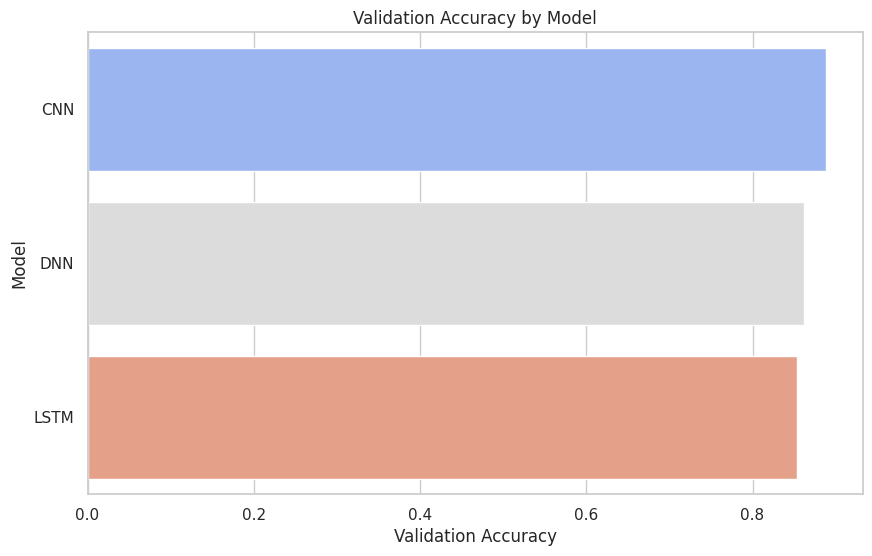

<ipython-input-82-e4e72bf3b75b>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_accuracy, palette='viridis')


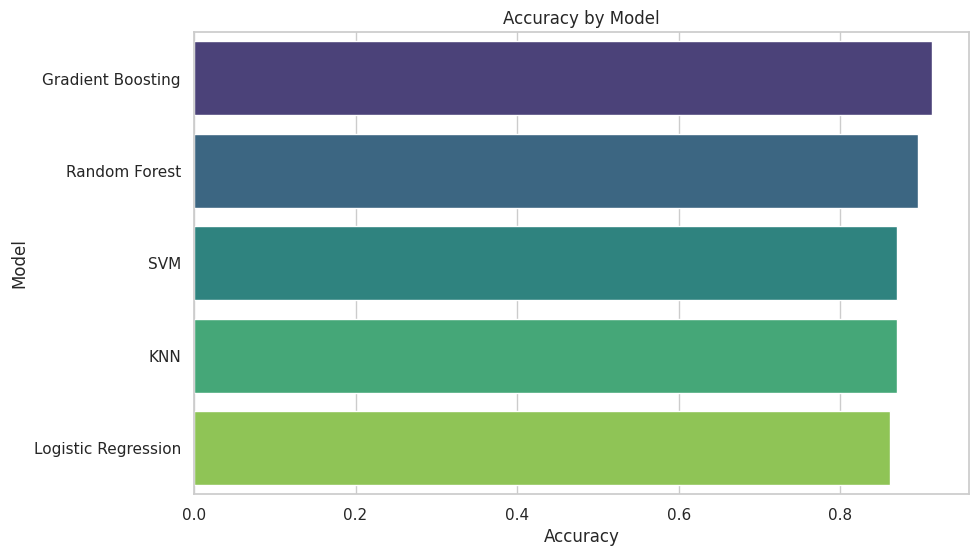

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for validation accuracy
validation_accuracy_data = {
    'Model': ['CNN', 'DNN', 'LSTM'],
    'Validation Accuracy': [0.887931, 0.862069, 0.853448]
}

# Data for accuracy
accuracy_data = {
    'Model': ['Gradient Boosting', 'Random Forest', 'SVM', 'KNN', 'Logistic Regression'],
    'Accuracy': [0.913793, 0.896552, 0.870690, 0.870690, 0.862069]
}

# Create DataFrame for validation accuracy and accuracy
df_validation_accuracy = pd.DataFrame(validation_accuracy_data)
df_accuracy = pd.DataFrame(accuracy_data)

# Set the visual style
sns.set(style="whitegrid")

# Plotting Validation Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Validation Accuracy', y='Model', data=df_validation_accuracy, palette='coolwarm')
plt.title('Validation Accuracy by Model')
plt.xlabel('Validation Accuracy')
plt.ylabel('Model')
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df_accuracy, palette='viridis')
plt.title('Accuracy by Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
